<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/%20ColabNotebooks/practice_06_discrete_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 6: Discrete Systems**
<!-- ## **Goals for today**

---



During today practice we will:
- Recall the pole placement and root locus techniques
- Solve the regulation and tracking problems -->




### **Discrete Time State Space**
The state space representation of such models are given by:
\begin{equation}
{\mathbf  {x}}[k+1]={\mathbf  A}_{d}{\mathbf  {x}}[k]+{\mathbf  B}_{d}{\mathbf  {u}}[k]
\end{equation}

where $\mathbf{x}[k],\mathbf{u}[k]$ are descrete **sequences** 

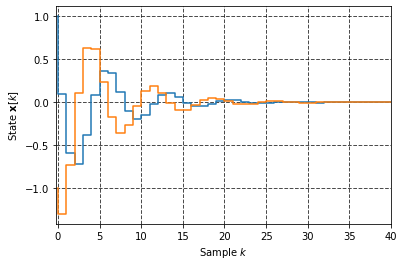

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A_d = np.array([[0.6, 0.5], 
              [-0.8, 0.5]])
N = 40
x = np.array([1,-1])
X = x
for k in range(N):
  x = A_d.dot(x)
  X = np.vstack((X, x))

plt.step(range(N+1),X)
plt.xlim([-0.2, N])
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.ylabel(r'State $\mathbf{x}[k]$')
plt.xlabel(r'Sample $k$')
plt.show()

### **Discretization**

Recall the linear system in state space form:
\begin{equation}
\mathbf{\dot{x}}(t)=\mathbf{A}\mathbf{x}(t) + \mathbf{B}\mathbf{u}(t)
\end{equation}

This equations may be represented in the descrete form via so called **discretization**. Discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts. This process is usually carried out as a first step toward making them suitable for numerical evaluation and implementation on digital computers.




In order to descretize system exactly, one just need to solve it on time interval $T$ (sampling time):

\begin{equation}
{\mathbf  A}_{d}=e^{{{\mathbf  A}T}}={\mathcal  {L}}^{{-1}}\{(s{\mathbf  I}-{\mathbf  A})^{{-1}}\}_{{t=T}}
\\
{\mathbf  B}_{d}=\left(\int _{{\tau =0}}^{{T}}e^{{{\mathbf  A}\tau }}d\tau \right){\mathbf  B}={\mathbf  A}^{{-1}}({\mathbf  A}_{d}-I){\mathbf  B}
\end{equation}


In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy import signal

def system_ode(x, t, A):
    dx = np.dot(A,x)
    return dx

A = np.array([[0, 1], 
              [-10, -5]])

B = np.array([[0], 
              [1]])

C = np.array([[1, 0]])
D = np.array([[0]])

T = 0.1

A_d, B_d, C_d, D_d, _ = signal.cont2discrete((A,B,C,D), T)
print(A_d, B_d, C_d, D_d)


[[ 0.95772944  0.07739424]
 [-0.7739424   0.57075825]] [[0.00422706]
 [0.07739424]] [[1 0]] [[0]]


Lets compare solutions of descrete system and it's continues original:

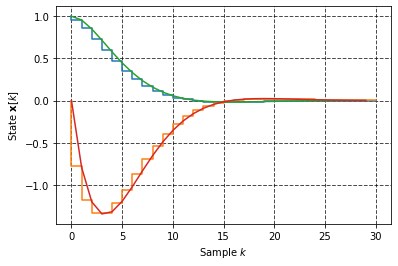

In [ ]:
N = 30
tf = N*T # Final time
t = np.linspace(0, tf, N) # Create time span
x0 = [1, 0] # Set initial state 

x_sol = odeint(system_ode, x0, t, args=(A, )) 
x = x0
x_d = x0
for k in range(N):
  x = A_d.dot(x)
  x_d = np.vstack((x_d, x))

plt.step(range(N+1), x_d)
plt.plot(x_sol)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.ylabel(r'State $\mathbf{x}[k]$')
plt.xlabel(r'Sample $k$')
plt.show()

### **Approximations**

  Exact discretization may sometimes be intractable due to the heavy matrix exponential and integral operations involved. It is much easier to calculate an approximate discrete model, based on that for small timesteps $e^{{{\mathbf  A}T}}\approx {\mathbf  I}+{\mathbf  A}T$. The approximate solution then becomes:


\begin{equation}
{\mathbf  x}[k+1]\approx ({\mathbf  I}+{\mathbf  A}T){\mathbf  x}[k]+T{\mathbf  B}{\mathbf  u}[k]
\end{equation}
Another method is to use so called bilinear transform, or Tustin transform. 
\begin{equation}
\mathbf{A}_d = e^{{{\mathbf  A}T}}\approx \left({\mathbf  I}+{\frac  {1}{2}}{\mathbf  A}T\right)\left({\mathbf  I}-{\frac  {1}{2}}{\mathbf  A}T\right)^{{-1}}
\end{equation}

Each of these approximations has different stability properties. The bilinear transform preserves the instability of the continuous-time system.

### **Exercise:**
Find the exact and approximate descretization of the following systems. 
$$\dot x = 
\begin{bmatrix} 10 & 0 \\ -5 & 10
\end{bmatrix}
x
+
\begin{bmatrix} 
2 \\ 0
\end{bmatrix}
u
$$

$$\dot x = 
\begin{bmatrix} 2 & 2 \\ -6 & 10
\end{bmatrix}
x
+
\begin{bmatrix} 
0 & -1 \\ 5 & -1
\end{bmatrix}
u
$$

In [ ]:
A = np.array([[0, 1], 
              [-10, -5]])

B = np.array([[0], 
              [1]])

C = np.array([[1, 0]])

D = np.array([[0]])

T = 0.001

A_d, B_d, C_d, D_d, _ = signal.cont2discrete((A,B,C,D), T)

print(f"Exact discretization:\n {A_d, B_d}")

A_d_approx = np.eye(2) + T*A 
B_d_approx = T*B

print(f"\nApproximate discretization:\n {A_d_approx, B_d_approx}")

Exact discretization:
 (array([[ 9.99995008e-01,  9.97502499e-04],
       [-9.97502499e-03,  9.95007496e-01]]), array([[4.99167291e-07],
       [9.97502499e-04]]))

Approximate discretization:
 (array([[ 1.   ,  0.001],
       [-0.01 ,  0.995]]), array([[0.   ],
       [0.001]]))


### **Stability**

the concepts of stability is fairly general and can be applied to the descrete time systems, however, in this case solutions may be analized directly, and stability criterias are the following:


*   Asymptotically stable $|\lambda_i| = \sqrt{\operatorname{Re}(\lambda_i)^2 + \operatorname{Im}(\lambda_i)^2} < 1,\forall i$ 
*   Lyapunov stable: $ |\lambda_i|\leq 1,\forall i$
*   Unstable: $\exists\lambda_i, |\lambda_i|>1 $


### **Exercise:**
Check the stability properties for system defined above. 

In [ ]:
from numpy.linalg import eig
e, v = eig(A_d)
print("Eigenvalues of A:\n", abs(e))

Eigenvalues of A:
 [0.99750312 0.99750312]


### **Descrete Feedback**

The general form of feedback that may stabilize our system is linear as well as for continues time system:
\begin{equation}
\mathbf{u}[k]=-\mathbf{K}\mathbf{x}[k]
\end{equation}

### **Pole Placement**

Previously we have designed a stable poles for continues time systems by placing them on the left hand side of comple plane. In case of descrete time systems we should place them inside of **unit circle**


In [ ]:
A = np.array([[3, 1], 
               [0, 2]])

B = np.array([[1], 
              [1]])

C = np.array([[1, 0]])
D = np.array([[0]])

T = 0.1

A_d, B_d, C_d, D_d, _ = signal.cont2discrete((A,B,C,D), T)

e, v = eig(A_d)
print("Original eigenvalues of A:\n", e)

#desired eigenvalues
poles = np.array([0.5+0.2j, 0.5-0.2j])
place_obj = signal.place_poles(A_d, B_d, poles)

#found control gains
K = place_obj.gain_matrix
print("\nGain matrix K:\n", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A_d - B_d.dot(K)))
print("\nPlaced eigenvalues of A - B*K:\n", abs(e))

Original eigenvalues of A:
 [1.34985881 1.22140276]

Gain matrix K:
 [[ 25.44175186 -13.96834808]]

Placed eigenvalues of A - B*K:
 [0.53851648 0.53851648]


In [ ]:
# Implement the stabilization problem